In [ ]:
import numpy as np
import time
from matplotlib import pyplot as plt
def max_heapify(h: np.ndarray, i: int):
    izquierda = 2*i + 1
    derecha = 2*i + 2
    mayor = i
    if derecha >= len(h) or mayor >= len(h) or izquierda >= len(h):
        return
    if izquierda < len(h)-1 and h[izquierda] > h[mayor]:
        mayor = izquierda
    if derecha < len(h)-1 and h[derecha] > h[mayor]:
        mayor = derecha

    if mayor != i:
        h[i], h[mayor] = h[mayor], h[i]
        max_heapify(h, mayor)


def insert_maxheap(h: np.ndarray, k: int) -> np.ndarray:

    n = len(h)
    h = np.append(h, k)
    i = n
    
    while i > 0 and h[i] > h[(i-1)//2]:
        h[i], h[(i-1)//2] = h[(i-1)//2], h[i]
        i = (i-1)//2
    
    return h


def create_maxheap(h: np.ndarray):

    for i in range((len(h)//2)-1, -1, -1):
        max_heapify(h, i)
h = [22,3,4,5,6,7,7,8,8,8,9,9,0]

j = np.ndarray[h]

def sort_maxheap(h: np.ndarray):
    for i in range(len(h)-1, 1, -1):
        h[i],h[0]= h[0],h[i]
        max_heapify(h[ :i],0)
        
def hs(h: np.ndarray):
    create_maxheap(h)
    sort_maxheap(h)

def time_heapsort(n_perms: int, size_ini: int, size_fin: int, step: int)-> list:
    list_tiempos_medias = []
    lista_y = []
    tamaño_array = []
    for e in range(size_ini,size_fin,step):
        tamaño_array.append(e)
        hacer_media_tiempos = []
        for i in range(n_perms):
            
            creamos_permutación = np.random.permutation(tamaño_array)  
            inicio=time.time()
            hs(creamos_permutación)
            fin = time.time()
            tiempo_ejecucion = fin - inicio
            hacer_media_tiempos.append(tiempo_ejecucion)
        result = sum(hacer_media_tiempos)/n_perms
        lista_y.append(e)
        list_tiempos_medias.append(result)
    plt.plot(lista_y,list_tiempos_medias)
    return list_tiempos_medias
a = time_heapsort(100,1,100,1)

II-D. Cuestiones
1. Sabemos que en el caso medio el coste de QuickSort es O(N log N). Utilizando las funciones anteriores, estimar
experimentalmente ese coste medio para diversos tamanos de tabla y comprobar graficamente que se ajustan al coste
medio esperado.
2. Si aplicamos nuestra funcion´ split a la tabla ordenada [1, 2, ..., N] tomando como pivote el primer elemento, ¿que´
subtablas obtendremos?
3. Argumentar a partir de lo anterior que el coste en el caso peor de QuickSort es al menos N(N−1)/2
.


III-A. Max heaps sobre arrays de Numpy

Vamos a implementar sobre arrays de Numpy diversas funciones de trabajo con max heaps. Para ello supondremos que un
max heap vac´ıo se representa como None.

1. Escribir una funcion´
max_heapify(h: np.ndarray, i: int)
que reciba un array h de Numpy y aplique la operacion de heapify al elemento situado en la posici ´ on´ i de manera in
place.


In [ ]:
import numpy as np
import time 

def max_heapify(h: np.ndarray, i: int):
    izquierda = 2*i + 1
    derecha = 2*i + 2
    mayor = i
    if derecha >= len(h) or mayor >= len(h) or izquierda >= len(h):
        return
    if izquierda < len(h)-1 and h[izquierda] > h[mayor]:
        mayor = izquierda
    if derecha < len(h)-1 and h[derecha] > h[mayor]:
        mayor = derecha

    if mayor != i:
        h[i], h[mayor] = h[mayor], h[i]
        max_heapify(h, mayor)



        



        

j = [9,1,2,8,3,7,4,6,5]




In [ ]:
# II-A: QuickSort sobre listas
# II-A.1: Split básico de listas

def split(t: list)-> list:
    """ 
    Recibe una lista de números y la divide en dos listas. Los elementos en l_left son menores que el pivote y los elementos en l_right mayores.

    Args:
        t (list): Recibe una lista de números sin repetición para ser dividida

    Returns:
        pivot(int) : El número que usa como pivote (t[0]) 
        l_left and l_right(lists): Las dos listas ya divididas
    """
    pivot= t[0]
    l_left = []
    l_right = []
    
    for element in t[1:]:
        if element < pivot:  #no puede haber elementos repetidos
            l_left.append(element)
        else:
            l_right.append(element)
            
    return l_left,pivot,l_right
    


In [ ]:
import networkx as nx
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])

for letra in ['A','B','C','D','E','F','G','H','I']:
    DG.add_node(letra)

# add edges
DG.add_weighted_edge_from('A', 'B', 1)
DG.add_weighted_edge_from('B', 'C', 1)
DG.add_weighted_edge_from('C', 'F', 1)
DG.add_weighted_edge_from('F', 'H', 1)
DG.add_weighted_edge_from('H', 'I', 1)
DG.add_weighted_edge_from('E', 'D', 1)
DG.add_weighted_edge_from('E', 'A', 1)
DG.add_weighted_edge_from('D', 'B', 1)
DG.add_weighted_edge_from('B', 'E', 1)
DG.add_weighted_edge_from('G', 'E', 1)
DG.add_weighted_edge_from('D', 'G', 1)
DG.add_weighted_edge_from('I', 'F', 1)

In [ ]:
# II-A.2: QuickSort en python sobre la lista t

def qs(t: list)-> list:
    """con recursión, vamos llamando numerosas veces a esya función hasta tener listas con un solo elemento 

    Args:
        t (list):Lista de números sin repetición

    Returns:
        list: lista de numeros ordenada
    """


    t_left, pivot, t_right = split(t)
    
    if len(t_left) > 1:
        
        t_left = qs(t_left)
    
    if len(t_right) > 1:
        
        t_right = qs(t_right)
    
    
    return t_left + [pivot] + t_right
    


print(qs([2,1,5,4,3,0]))


        


II-B. QuickSort in place sobre arrays de NumPy
Vamos a mejorar nuestra version anterior de QuickSort para que trabaje con arrays de NumPy de manera in place. ´
1. Escribir una funcion´
split_ip(t: np.ndarray, f: int, l: int)
que distribuye los elementos de t entre los ´ındices f incluido y l excluido, a la izquierda y derecha del elemento t[f]
y devuelve el indice ocupado finalmente por el elemento que estaba incialmente en f.
La funcion debe ser ´ in place, esto es, usar solo el array t y ningun otro array o lista auxiliar. Naturalmente, tampoco ´
debe devolver nada.


In [ ]:
# II-B: QuickSort sobre arrays de NumPy
# II-B.1: Split para array NumPy

def split_ip(t: np.ndarray,f,l) -> int:
    piv = t[f]
    m = f
    for i in range(f+1, l):
        if t[i] < piv:
            m += 1
            t[i], t[m] = t[m], t[i]
    t[f], t[m] = t[m], t[f]
    return m


2. Escribe una funcion´
qs_ip(t: np.ndarray, f: int, l: int):
que implementa QuickSort para ordenar un array t entre los ´ındices f incluido y l excluido usando la funcion´ split_ip
anterior.
De nuevo, la funcion debe ser in place, esto es, usar solo el array ´ t y ningun otro array o lista auxiliar

In [ ]:
import numpy as np


def qs_ip(t: np.ndarray, f: int, l: int):
 
    if t == []:
        return t
    if f < l:
        p = split_ip(t,f,l)
        qs_ip(t,f,p)
        qs_ip(t, p + 1,l)
    if f >= l:
        return 



    
    

a =[4,8,3,-5,2,1,9,11]
qs_ip(a,3,6)
print(a)



II-C. Midiendo tiempos de ejecucion en QuickSort

1. Escribe una funcion´
time_quicksort(n_permutations: int, size_ini: int, size_fin: int, step: int)-> List
que devuelva una lista con los tiempos medios empleados por QuickSort en cada paso de las ejecuciones sobre
n_permutations permutaciones de tamanos entre ˜ size_ini y size_fin, que se se van incrementando en tamanos ˜ step.
Esto es, para tamanos de permutaci ˜ on entre ´ size_ini y size_fin con incrementos step

a) Generar n_permutations permutaciones aleatorias mediante el metodo Numpy adecuado.

b) Ordenarlas mediante QuickSort midiendo el tiempo de ejecucion con el m ´ etodo ´ time.

c) Calcular la media de los tiempos de ejecucion y a ´ nadirlos a la lista correspondiente. 

In [ ]:
import time
def ave_time_quick_sort(n_permutations: int,size_ini:int,size_fin:int,step:int) -> np.array:
    
    list_tiempos_medias = []
    tamaño_array = []
    
    for e in range(size_ini,size_fin,step):
        
        tamaño_array.append(e)
        hacer_media_tiempos = []
        
        for i in range(n_permutations):
            
            creamos_permutación = np.random.permutation(e)  
            inicio=time.time()
            qs(creamos_permutación)
            fin = time.time()
            tiempo_ejecucion = fin - inicio
            hacer_media_tiempos.append(tiempo_ejecucion)
        
        result = sum(hacer_media_tiempos)/n_permutations
        list_tiempos_medias.append(result)
        
    result = dict(zip(tamaño_array,list_tiempos_medias) )
       
    return result

ave_time_quick_sort(10,60,100,1)
    #codigo para hacer la grafica y comprobar que se ajusta a un coste N log N.
from matplotlib import pyplot as plt    




comprobar = ave_time_quick_sort(10,30,1500,3)

lista_tamaños = []
lista_tiempos = []
for key in comprobar:
    valor = comprobar[key]
    lista_tiempos.append(valor)
    lista_tamaños.append(key)


plt.scatter(lista_tamaños,lista_tiempos)

mymodel = np.poly1d(np.polyfit(lista_tamaños,lista_tiempos,1))
myline = np.linspace(0, 1500) 
plt.plot(myline,mymodel(myline))



    



    

    


2. En ocasiones queremos insertar un nuevo elemento en un max heap existente de manera que se tenga un nuevo max
heap. Escribir una funcion

insert_maxheap(h: np.ndarray, k: int)-> np.ndarray

que inserte el entero k al final del array h que contiene el max heap y, a continuacion, transforme el array ampliado en ´
un nuevo max heap y lo devuelva

In [ ]:

def insert_maxheap(h: np.ndarray, k: int) -> np.ndarray:

    n = len(h)
    h = np.append(h, k)
    i = n
    
    while i > 0 and h[i] > h[(i-1)//2]:
        h[i], h[(i-1)//2] = h[(i-1)//2], h[i]
        i = (i-1)//2
    
    return h

3. En otras ocasiones lo que se desea es transformar un array en un max heap de manera in-place. Escribir una funcion

create_maxheap(h: np.ndarray)

que cree un max heap sobre el array de Numpy pasado como argumento. Se recuerda que esta creacion debe hacerse ´
in-place, esto es, sobre el propio array sin usar ningun otro auxiliar (y sin devolver nada). 

In [ ]:

def create_maxheap(h: np.ndarray):

    for i in range((len(h)//2)-1, -1, -1):
        max_heapify(h, i)

III-B. HeapSort
Como sabemos, el algoritmo HeapSort consiste en construir primero un max heap mediante, por ejemplo, la funcion´create_maxheap anterior, para a continuacion ordenarlo. ´
1. Escribir una funcion sort_maxheap(h: np.ndarray) que recibe un array Numpy con un maxheap y lo ordena, realizando todas las operaciones de manera in place.


In [ ]:
def sort_maxheap(h: np.ndarray):
    for i in range(len(h)-1, 1, -1):
        h[i],h[0]= h[0],h[i]
        max_heapify(h[ :i],0)

2. Combinar las funciones anteriores en una funcion´hs(h: np.ndarray)
que recibe un array Numpy y lo ordena, realizando todas las operaciones de manera in place.

In [ ]:
def hs(h: np.ndarray):
    create_maxheap(h)
    sort_maxheap(h)

3. Queremos escribir una funcion para medir tiempos de ejecuci ´ on de HeapSort ´
time_heapsort(n_perms: int, size_ini: int, size_fin: int, step: int)-> List
que devuelva una lista con los tiempos medios empleados por HeapSort al ejecutarse sobre n_permutations permutaciones
de tamanos entre ˜ size_ini y size_fin, que se se van incrementando en tamanos ˜ step

[0.0, 0.0, 9.968280792236329e-06, 1.9958019256591795e-05, 3.130435943603516e-05, 0.0, 0.0, 3.045797348022461e-05, 3.570079803466797e-05, 2.9883384704589845e-05, 4.8613548278808595e-05, 3.0698776245117185e-05, 6.03485107421875e-05, 0.0002514815330505371, 0.00010009765625, 6.976604461669922e-05, 8.489370346069336e-05, 5.974531173706055e-05, 0.00012332439422607422, 8.372068405151367e-05, 6.97469711303711e-05, 5.9862136840820315e-05, 7.973670959472656e-05, 0.00010963201522827148, 0.00010960340499877929, 9.948015213012695e-05, 9.594202041625977e-05, 0.00010918378829956054, 0.00011002302169799805, 0.00012223243713378905, 0.00014423847198486329, 0.00012956619262695314, 0.00014961719512939452, 0.0001295328140258789, 0.00012957096099853516, 0.00015946388244628907, 0.0001593661308288574, 0.00013942480087280273, 0.000159909725189209, 0.00013959884643554687, 0.00019109725952148437, 0.00019937515258789063, 0.00020432233810424805, 0.00019919633865356446, 0.0001797318458557129, 0.0002185845375061035,

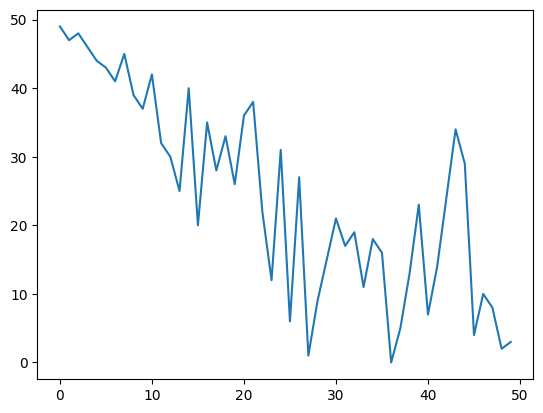

In [41]:
def time_heapsort(n_perms: int, size_ini: int, size_fin: int, step: int)-> list:
    list_tiempos_medias = []
    tamaño_array = []
    for e in range(size_ini,size_fin,step):
        tamaño_array.append(e)
        hacer_media_tiempos = []
        for i in range(n_perms):
            creamos_permutación = np.random.permutation(tamaño_array)  
            inicio=time.time()
            hs(creamos_permutación)
            fin = time.time()
            tiempo_ejecucion = fin - inicio
            hacer_media_tiempos.append(tiempo_ejecucion)
        result = sum(hacer_media_tiempos)/n_perms
        list_tiempos_medias.append(result)
    return list_tiempos_medias

a = time_heapsort(100,1,100,1)
print(a)  


import numpy as np
permutacion = np.random.permutation(50)
lista = []
for i in range(50):
    lista.append(i)
    
print(permutacion)
create_maxheap(permutacion)
print(permutacion)
plt.plot(lista,permutacion)
plt.show()

In [12]:
import networkx  as nx

DG = nx.DiGraph()

for letra in ['A','B','C','D','E','F','G','H','I']:
    DG.add_node(letra)

# add edges
DG.add_weighted_edges_from([('A', 'B', 1)])
DG.add_weighted_edges_from([('B', 'C', 1)])
DG.add_weighted_edges_from([('C', 'F', 1)])
DG.add_weighted_edges_from([('F', 'H', 1)])
DG.add_weighted_edges_from([('H', 'I', 1)])
DG.add_weighted_edges_from([('E', 'D', 1)])
DG.add_weighted_edges_from([('E', 'A', 1)])
DG.add_weighted_edges_from([('D', 'B', 1)])
DG.add_weighted_edges_from([('B', 'E', 1)])
DG.add_weighted_edges_from([('G', 'E', 1)])
DG.add_weighted_edges_from([('D', 'G', 1)])
DG.add_weighted_edges_from([('I', 'F', 1)])

print(nx.is_strongly_connected(DG))
print(nx.number_strongly_connected_components(DG))
print(nx.condensation(DG))
print(nx.strongly_connected_components(DG))
for i in nx.strongly_connected_components(DG):
    print(i)


False
3
DiGraph with 3 nodes and 2 edges
<generator object strongly_connected_components at 0x000002D732314510>
{'F', 'I', 'H'}
{'C'}
{'A', 'B', 'G', 'E', 'D'}
